Семенова Евгения
2 курс экономический факультет

# Обработка датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("flights_NY.csv")  #чтение файла
df = df.dropna() #удаление строк с пустыми значениями
df = df.reset_index(drop=True) #запись строк с новыми индексами из-за удаления пропущенных
df.head(15)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065
7,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229
8,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944
9,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733


# **Задание 1**
## 1)Создадим агрегированную таблицу. Отношение полетов с положительной задержкой прилета ко всем полетам с задержками прилета для каждой авиакомпании. То есть найдем вероятность для каждой авиакомпании.  


In [ ]:
pos = df[df['arr_delay'] >= 0].groupby('carrier').size() #создаем переменную с количеством положительных задержек прилета
all = df.groupby('carrier').size() #переменная с количеством всех задержек прилета
otn = pos / all #отношение положительных ко всем
res = otn.reset_index(name='otn') #таблица с результатами для каждой авиакомпании
otn.reset_index(name='otn') #выводим таблицу

## 2) Создадим график. Ось ординат показывает вероятность задержки, ось абсцисс авиакомпанию

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Вероятность положительной задержки прилета по авиакомпаниям по алфавиту')
plt.bar(res['carrier'], res['otn'], color='indigo', edgecolor='green')
plt.xlabel('Авиакомпания')
plt.ylabel('Вероятность положительной задержки прилета')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

## 2.1) Такой же график, только по возрастанию вероятностей

In [ ]:
sres = res.sort_values(by='otn') #отсортированные вероятности

plt.figure(figsize=(10, 5))
plt.bar(sres['carrier'], sres['otn'], color='indigo', edgecolor='green')
plt.xlabel('Авиакомпания')
plt.ylabel('Вероятность положительной задержки прилета')
plt.title('Вероятность положительной задержки прилета по авиакомпаниям по возрастанию')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# **Задание 2**
## 1) Разделим на три примерно равные группы все полеты в отсортированном виде.

In [ ]:
df['flt'] = pd.qcut(df['distance'], q=3, labels=['короткие', 'средние', 'длинные'])

NameError: name 'df' is not defined

## 2) Создадим график для каждой группы

In [ ]:
fl = ['короткие', 'средние', 'длинные']
for flt in fl: # пройдем по массиву определяя в какую группу будет отнесен полет
    tf = df[df['flt'] == flt] # таблица в которой все типы полета относятся к одной группе
    plt.figure(figsize=(10, 5))
    plt.hist(tf['distance'], bins=20, color='indigo', edgecolor='green')
    plt.xlabel('Дистанция')
    plt.ylabel('Количество')
    plt.title('График перелетов - {}'.format(flt))
    plt.ylim(0, 35000)
    plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()


NameError: name 'df' is not defined

## 3) Среднее значение задержки вылета для каждой группы полетов

In [ ]:
dfs = df[df['flt'] == "короткие"]
dfm = df[df['flt'] == "средние"]
dfl = df[df['flt'] == "длинные"]
print("средняя задержка коротких рейсов", dfs['dep_delay'].mean())
print("средняя задержка средних рейсов", dfm['dep_delay'].mean())
print("средняя задержка длинных рейсов", dfl['dep_delay'].mean())

## 4) Уникальные направления дальних полетов

In [ ]:
udest = (dfl["dest"].unique())
for u in udest:
  print(u, end=' ')

# **Задание 3**
## 1) Выведем сводную таблицу для выборки по каждуому месяцу с нужными параметрами. Количество, среднее значение и стандартное отклонение. Воспользуемся т-тестом.


In [ ]:
df.groupby(["month"])["dep_delay"].aggregate(['count', 'mean', 'std'])

## 2) Создадим датасеты для каждого параметра

In [ ]:
df_sr=df.groupby(["month"])["dep_delay"].mean()
df_count=df.groupby(["month"])["dep_delay"].count()
df_std=df.groupby(["month"])["dep_delay"].std()

## 3) Определяем значения для нахождения доверительного интервала

In [ ]:
z = stats.norm.ppf((1 - 0.95) / 2) # значение определяется по таблице для конкретного уровня доверия
gr_v = df_sr + z * (df_std / np.sqrt(df_count)) # верхняя граница интервала
gr_n = df_sr - z * (df_std / np.sqrt(df_count)) # нижняя граница интервала

## 4) Строим график

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_sr.index, df_sr, marker="o", color='indigo')
plt.fill_between(df_sr.index, gr_n, gr_v, color='green', alpha=0.5)
plt.xlabel('месяц')
plt.title('Средняя задержка прилета для каждого месяца с 95% доверительным интервалом')
plt.xticks(df_sr.index)
plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

## 5) Создадим два датасета с задержками вылета в январе и в феврале

In [ ]:
jan = df[df['month'] == 1]['dep_delay']
feb = df[df['month'] == 2]['dep_delay']

## 6) Посчитаем всех необходимые значения для t-расчетного и p-значения

In [ ]:
t, p = stats.ttest_ind(jan, feb)
print("расчетное значение:", t)
print("p-значение:", p)

расчетное значение: -2.386498623322741
p-значение: 0.017013366495100535


## 7) Проверим гипотезы

In [ ]:
if p < 0.05:
    print("H0 отвергается, то есть при уровне значимости 5% средняя задержка вылета в январе и феврале не равна")
else:
    print("H0 не отвергается, то есть при уровне значимости 5% средняя задержка вылета в январе и феврале равна")

if p < 0.01:
     print("H0 отвергается, то есть при уровне значимости 1% средняя задержка вылета в январе и феврале не равна")
else:
    print("H0 не отвергается, то есть при уровне значимости 1% средняя задержка вылета в январе и феврале равна")


H0 отвергается, то есть при уровне значимости 5% средняя задержка вылета в январе и феврале не равна
H0 не отвергается, то есть при уровне значимости 1% средняя задержка вылета в январе и феврале равна


# **Задание 4**
## 1) Найдем коэффициент корреляции

In [ ]:
cor = df['distance'].corr(df['air_time'])
print("коэффициент корреляции:", cor)

## 2)Найдем уравнение регрессии

In [ ]:
b2, b1, corr, p, st = stats.linregress(df['distance'], df['air_time'])
rl = b1 + b2 * df['distance']
print("уравнение регрессии:","air_time =",b1.round(2),"+", b2.round(2),"* distance")

Коэффициент 0.13 при переменной distance означает, что 1 единица дистанции полета увеличивает время полета на 0.13 единиц. Коэффициент 18.47 - это коэффициент показывающий, что по умолчанию полет не может быть меньше 18.47 минут.  

## 3) Построим график

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['air_time'], alpha=0.2, color="indigo")
plt.plot(df['distance'], rl, color='green')
plt.xlabel('Расстояние')
plt.ylabel('Время в полете')
plt.title('Диаграмма рассеивания с линией регрессии')
plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# **Задание 5**
## 1) Отфильтруем нужные значения в новый датасет

In [ ]:
f_df = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]

## 2) Предполагаем, что это нормальное распределение и ищем необходимые параметры.

In [ ]:
sr, st = stats.norm.fit(f_df['arr_delay']) # среднее значение и стандартное отклонение
x = np.linspace(f_df['arr_delay'].min(), f_df['arr_delay'].max(), 100) # задаем линию распределения
v = stats.norm.pdf(x, sr, st) # плотность вероятности

## 3) Строим график

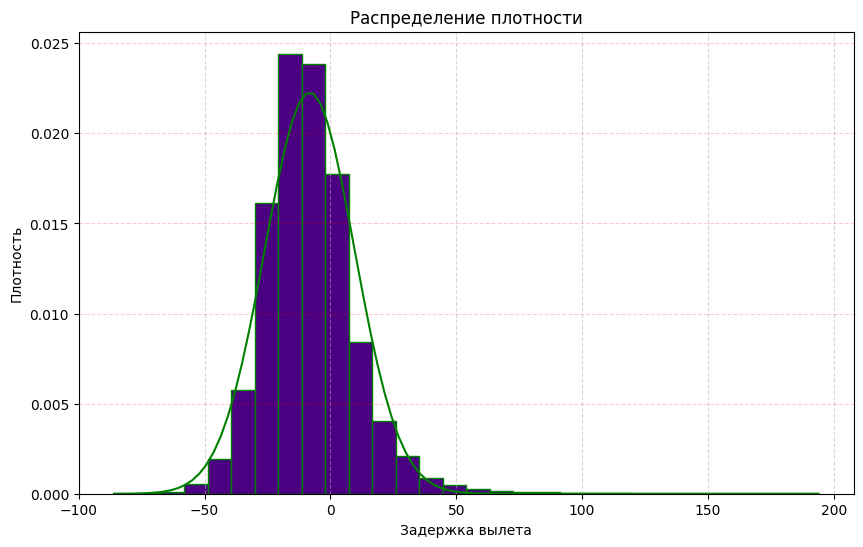

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(f_df['arr_delay'], bins=30, density=True, color='indigo', edgecolor='green')
plt.plot(x, v, color ='green')
plt.xlabel('Задержка вылета')
plt.ylabel('Плотность')
plt.title('Распределение плотности')
plt.grid(axis='y', linestyle='--', alpha=0.2, color="red")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()